# Importing data & Libraries

In [4]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
from mysql.connector import Error
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
sns.set()
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("/Users/aa085/Lets begin/Readytogo.csv")
df

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,MPAA,genres,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.0,2009,7.9,81.0,82.0,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0,0,1,0,0,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.0,2019,8.4,94.0,90.0,...,PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3,0,0,0,0,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.0,2022,7.6,76.0,92.0,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0,0,1,0,0,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.0,1997,6.1,60.0,57.0,...,PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2,0,0,1,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.0,2015,7.8,93.0,85.0,...,PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.0,2002,5.5,41.0,38.0,...,PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king,"DwayneJohnson,StevenBrand,MichaelClarkeDuncan,...",2,0,0,1,0,0
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.0,2002,6.2,38.0,78.0,...,PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama,"ReeseWitherspoon,PatrickDempsey,JoshLucas,Cand...",0,0,1,0,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.0,2017,6.0,21.0,51.0,...,PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2,"WillFerrell,MarkWahlberg,MelGibson,JohnLithgow",2,0,0,1,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.0,2016,8.1,84.0,91.0,...,R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge,"AndrewGarfield,SamWorthington,LukeBracey,Teres...",0,0,1,0,0,0


In [474]:
df2=pd.read_csv("/Users/aa085/Lets begin/Addition.csv")
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,Name.1,All ranks
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221","$1,067,316,101",Walt Disney Studios Motion PicturesSee full co...,"$110,307,189","$200,000,000","June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,Toy Story 3,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106","$1,025,468,216",Walt Disney Studios Motion PicturesSee full co...,"$116,101,023","$200,000,000","March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,Alice in Wonderland,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300","$839,030,630",Warner Bros.See full company information,"$62,785,337","$160,000,000","July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,Inception,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080","$752,600,867",DreamWorksSee full company information,"$70,838,207","$165,000,000","May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,Shrek Forever After,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074","$698,509,825",Summit EntertainmentSee full company information,"$64,832,191","$68,000,000","June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,The Twilight Saga: Eclipse,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935","$12,544,254",Screen GemsSee full company information,"$5,088,577","$10,000,000","May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,Breakin' All the Rules,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697","$12,313,323",Warner Bros.See full company information,"$6,081,483","$23,000,000","January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,Chasing Liberty,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262","$11,416,075",Paramount PicturesSee full company information,"$3,446,375","$27,000,000","August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,Suspect Zero,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245","$11,341,016",Universal PicturesSee full company information,"$3,254,940","$27,000,000","April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,Connie and Carla,6.20


# Data Cleaning & Processing

In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Director', 'distributor', 'Time', 'Year',
       'IMDB', 'Tomatometer', 'Rotten Tomatos Audience', 'TMDB',
       'Domestic Percentage', 'Foreign percentage', 'Domestic Money',
       'international', 'wordlwide', 'DomesticOpening', 'Budget', 'Date',
       'MPAA', 'genres', 'linkselection', 'Actors', 'BestActorPresent',
       'Fouractors', 'NOactor', 'OneActor', 'Threeactors', 'Twoactors'],
      dtype='object')

In [475]:
df2=df2.drop(["Name.1"],axis=1)
df2.rename(columns={'All ranks': 'TMDB'}, inplace=True)
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,TMDB
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221","$1,067,316,101",Walt Disney Studios Motion PicturesSee full co...,"$110,307,189","$200,000,000","June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106","$1,025,468,216",Walt Disney Studios Motion PicturesSee full co...,"$116,101,023","$200,000,000","March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300","$839,030,630",Warner Bros.See full company information,"$62,785,337","$160,000,000","July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080","$752,600,867",DreamWorksSee full company information,"$70,838,207","$165,000,000","May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074","$698,509,825",Summit EntertainmentSee full company information,"$64,832,191","$68,000,000","June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935","$12,544,254",Screen GemsSee full company information,"$5,088,577","$10,000,000","May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697","$12,313,323",Warner Bros.See full company information,"$6,081,483","$23,000,000","January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262","$11,416,075",Paramount PicturesSee full company information,"$3,446,375","$27,000,000","August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245","$11,341,016",Universal PicturesSee full company information,"$3,254,940","$27,000,000","April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,6.20


In [476]:
df2["DomesticOpening"].value_counts()

$47,211,490    7
$1,218,868     7
$30,452        6
$51,061,119    5
$6,713,900     4
              ..
$8,364,658     1
$10,441,000    1
$387,618       1
$135,388       1
$53,003,468    1
Name: DomesticOpening, Length: 1519, dtype: int64

In [477]:
df2["DomesticOpening"] = df2["DomesticOpening"].str.replace("See more details at IMDbPro", "0")
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,TMDB
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221","$1,067,316,101",Walt Disney Studios Motion PicturesSee full co...,"$110,307,189","$200,000,000","June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106","$1,025,468,216",Walt Disney Studios Motion PicturesSee full co...,"$116,101,023","$200,000,000","March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300","$839,030,630",Warner Bros.See full company information,"$62,785,337","$160,000,000","July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080","$752,600,867",DreamWorksSee full company information,"$70,838,207","$165,000,000","May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074","$698,509,825",Summit EntertainmentSee full company information,"$64,832,191","$68,000,000","June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935","$12,544,254",Screen GemsSee full company information,"$5,088,577","$10,000,000","May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697","$12,313,323",Warner Bros.See full company information,"$6,081,483","$23,000,000","January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262","$11,416,075",Paramount PicturesSee full company information,"$3,446,375","$27,000,000","August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245","$11,341,016",Universal PicturesSee full company information,"$3,254,940","$27,000,000","April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,6.20


In [479]:
df2.loc[df2['international']==df2['Domestic Money'],'wordlwide']=df2['international']
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,TMDB
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221","$1,067,316,101",Walt Disney Studios Motion PicturesSee full co...,"$110,307,189","$200,000,000","June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106","$1,025,468,216",Walt Disney Studios Motion PicturesSee full co...,"$116,101,023","$200,000,000","March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300","$839,030,630",Warner Bros.See full company information,"$62,785,337","$160,000,000","July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080","$752,600,867",DreamWorksSee full company information,"$70,838,207","$165,000,000","May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074","$698,509,825",Summit EntertainmentSee full company information,"$64,832,191","$68,000,000","June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935","$12,544,254",Screen GemsSee full company information,"$5,088,577","$10,000,000","May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697","$12,313,323",Warner Bros.See full company information,"$6,081,483","$23,000,000","January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262","$11,416,075",Paramount PicturesSee full company information,"$3,446,375","$27,000,000","August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245","$11,341,016",Universal PicturesSee full company information,"$3,254,940","$27,000,000","April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,6.20


In [485]:
df2["DomesticOpening"]=df2["DomesticOpening"].str.replace(',','')
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,TMDB
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221",1067316101,Walt Disney Studios Motion PicturesSee full co...,110307189,200000000,"June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106",1025468216,Walt Disney Studios Motion PicturesSee full co...,116101023,200000000,"March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300",839030630,Warner Bros.See full company information,62785337,160000000,"July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080",752600867,DreamWorksSee full company information,70838207,165000000,"May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074",698509825,Summit EntertainmentSee full company information,64832191,68000000,"June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935",12544254,Screen GemsSee full company information,5088577,10000000,"May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697",12313323,Warner Bros.See full company information,6081483,23000000,"January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262",11416075,Paramount PicturesSee full company information,3446375,27000000,"August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245",11341016,Universal PicturesSee full company information,3254940,27000000,"April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,6.20


In [486]:
df2["Budget"] = df2["Budget"].astype(int)
df2["wordlwide"] = df2["wordlwide"].astype(int)
df2["DomesticOpening"] = df2["DomesticOpening"].astype(int)
df2

,Unnamed: 0,Name,Year,Domestic Percentage,Foreign percentage,Domestic Money,international,wordlwide,distributor,DomesticOpening,Budget,Date,MPAA,Time,genres,TMDB
0,0,Toy Story 3,2010,38.9%,61.1%,"$415,004,880","$652,311,221",1067316101,Walt Disney Studios Motion PicturesSee full co...,110307189,200000000,"June 16, 2010 (Egypt)",1 hr 43 min,Adventure Animation Come...,See more details at IMDbPro,8.30
1,1,Alice in Wonderland,2010,32.6%,67.4%,"$334,191,110","$691,277,106",1025468216,Walt Disney Studios Motion PicturesSee full co...,116101023,200000000,"March 3, 2010 (EMEA)",PG,1 hr 48 min,Adventure Family Fantasy...,7.30
2,2,Inception,2010,34.9%,65.1%,"$292,587,330","$546,443,300",839030630,Warner Bros.See full company information,62785337,160000000,"July 15, 2010 (APAC, EMEA)",PG-13,2 hr 28 min,Action Adventure Sci-Fi ...,8.80
3,3,Shrek Forever After,2010,31.7%,68.3%,"$238,736,787","$513,864,080",752600867,DreamWorksSee full company information,70838207,165000000,"May 20, 2010 (EMEA, APAC)",PG,1 hr 35 min,Adventure Animation Come...,6.30
4,4,The Twilight Saga: Eclipse,2010,43%,57%,"$300,531,751","$397,978,074",698509825,Summit EntertainmentSee full company information,64832191,68000000,"June 30, 2010 (20 markets)",PG-13,2 hr 4 min,Action Adventure Drama ...,5.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,Breakin' All the Rules,2004,97.8%,2.2%,"$12,264,319","$279,935",12544254,Screen GemsSee full company information,5088577,10000000,"May 14, 2004 (Domestic)",PG-13,1 hr 25 min,Comedy Romance,5.60
1759,584,Chasing Liberty,2004,99%,1%,"$12,195,626","$117,697",12313323,Warner Bros.See full company information,6081483,23000000,"January 9, 2004 (Domestic)",PG-13,1 hr 41 min,Comedy Romance,6.10
1760,585,Suspect Zero,2004,76.4%,23.6%,"$8,725,813","$2,690,262",11416075,Paramount PicturesSee full company information,3446375,27000000,"August 27, 2004 (Domestic)",R,1 hr 39 min,Crime Horror Mystery ...,5.80
1761,586,Connie and Carla,2004,71.3%,28.7%,"$8,085,771","$3,255,245",11341016,Universal PicturesSee full company information,3254940,27000000,"April 16, 2004 (Domestic)",PG-13,1 hr 48 min,Comedy Crime Music,6.20


In [487]:
df2 = df2.drop_duplicates(subset='Name', keep='first')

In [488]:
df2["Name"].value_counts().head(40)

Toy Story 3                                              1
Dolittle                                                 1
Violet Evergarden: The Movie                             1
The Photograph                                           1
Emma.                                                    1
Like a Boss                                              1
Harry Potter and the Sorcerer's Stone                    1
Bloodshot                                                1
Fantasy Island                                           1
The Call of the Wild                                     1
The Invisible Man                                        1
Shock Wave 2                                             1
Birds of Prey                                            1
Sonic the Hedgehog                                       1
The Dark Knight                                          1
My People, My Homeland                                   1
Bad Boys for Life                                       

In [489]:
df2["TMDB"]=df2["TMDB"]*10

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_1052/70064103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["TMDB"]=df2["TMDB"]*10


In [498]:
df.sort_values(by='wordlwide')[['wordlwide','Name','international','Domestic Money']].head(40)

,wordlwide,Name,international,Domestic Money
999,180557550,Deja Vu,116518934,64038616
998,180563636,Hacksaw Ridge,113354021,67209615
997,180613824,Daddy's Home 2,76584381,104029443
996,180622424,Sweet Home Alabama,53399006,127223418
995,180630907,The Scorpion King,89583830,91047077
994,180906076,Kill Bill: Vol. 1,110807031,70099045
993,181001478,Road to Perdition,76546716,104454762
992,181096164,Hot Shots!,111628547,69467617
991,181239132,Scooby-Doo 2: Monsters Unleashed,97000000,84239132
990,181325565,Cliff Walkers,181172593,152972


In [497]:
df.loc[df['international']==df['Domestic Money'],'wordlwide']=df['international']
df

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,MPAA,genres,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.00,2009,7.90,81.00,82.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0,0,1,0,0,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,8.40,94.00,90.00,...,PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3,0,0,0,0,1
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.00,2022,7.60,76.00,92.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0,0,1,0,0,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,6.10,60.00,57.00,...,PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2,0,0,1,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,7.80,93.00,85.00,...,PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,tt0277296,The Scorpion King,Chuck Russell,Universal Pictures,92.00,2002,5.50,41.00,38.00,...,PG-13,Action Adventure Fantasy,https://watch.plex.tv/movie/the-scorpion-king,"DwayneJohnson,StevenBrand,MichaelClarkeDuncan,...",2,0,0,1,0,0
996,996,tt0256415,Sweet Home Alabama,Andy Tennant,Walt Disney Studios Motion Pictures,108.00,2002,6.20,38.00,78.00,...,PG-13,Comedy Romance,https://watch.plex.tv/movie/sweet-home-alabama,"ReeseWitherspoon,PatrickDempsey,JoshLucas,Cand...",0,0,1,0,0,0
997,997,tt5657846,Daddy's Home 2,Sean Anders,Paramount Pictures,100.00,2017,6.00,21.00,51.00,...,PG-13,Comedy,https://watch.plex.tv/movie/daddys-home-2,"WillFerrell,MarkWahlberg,MelGibson,JohnLithgow",2,0,0,1,0,0
998,998,tt2119532,Hacksaw Ridge,Mel Gibson,Lions Gate Films,139.00,2016,8.10,84.00,91.00,...,R,Biography Drama History ...,https://watch.plex.tv/movie/hacksaw-ridge,"AndrewGarfield,SamWorthington,LukeBracey,Teres...",0,0,1,0,0,0


In [503]:
DF=pd.concat([df,df2],axis=0)
DF

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,MPAA,genres,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.00,2009,7.90,81.00,82.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0.00,0.00,1.00,0.00,0.00,0.00
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,8.40,94.00,90.00,...,PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3.00,0.00,0.00,0.00,0.00,1.00
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.00,2022,7.60,76.00,92.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0.00,0.00,1.00,0.00,0.00,0.00
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,6.10,60.00,57.00,...,PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2.00,0.00,0.00,1.00,0.00,0.00
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,7.80,93.00,85.00,...,PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,NaN,Breakin' All the Rules,NaN,Screen GemsSee full company information,1 hr 25 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759,584,NaN,Chasing Liberty,NaN,Warner Bros.See full company information,1 hr 41 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1760,585,NaN,Suspect Zero,NaN,Paramount PicturesSee full company information,1 hr 39 min,2004,NaN,NaN,NaN,...,R,Crime Horror Mystery ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1761,586,NaN,Connie and Carla,NaN,Universal PicturesSee full company information,1 hr 48 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Crime Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [504]:
DF = DF.drop_duplicates() 
DF

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,MPAA,genres,linkselection,Actors,BestActorPresent,Fouractors,NOactor,OneActor,Threeactors,Twoactors
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.00,2009,7.90,81.00,82.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar,"SamWorthington,ZoeSaldana,SigourneyWeaver,Mich...",0.00,0.00,1.00,0.00,0.00,0.00
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,8.40,94.00,90.00,...,PG-13,Action Adventure Drama ...,https://watch.plex.tv/movie/avengers-endgame,"RobertDowneyJr.,ChrisEvans,MarkRuffalo,ChrisHe...",3.00,0.00,0.00,0.00,0.00,1.00
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.00,2022,7.60,76.00,92.00,...,PG-13,Action Adventure Fantasy...,https://watch.plex.tv/movie/avatar-2,"SamWorthington,ZoeSaldana,SigourneyWeaver,Step...",0.00,0.00,1.00,0.00,0.00,0.00
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,6.10,60.00,57.00,...,PG-13,Drama Romance,https://watch.plex.tv/movie/titanic,"LeonardoDiCaprio,KateWinslet,BillyZane,KathyBates",2.00,0.00,0.00,1.00,0.00,0.00
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,7.80,93.00,85.00,...,PG-13,Action Adventure Sci-Fi,https://watch.plex.tv/movie/star-wars-episode-...,"DaisyRidley,JohnBoyega,OscarIsaac,DomhnallGleeson",0.00,0.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,NaN,Breakin' All the Rules,NaN,Screen GemsSee full company information,1 hr 25 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1759,584,NaN,Chasing Liberty,NaN,Warner Bros.See full company information,1 hr 41 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1760,585,NaN,Suspect Zero,NaN,Paramount PicturesSee full company information,1 hr 39 min,2004,NaN,NaN,NaN,...,R,Crime Horror Mystery ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1761,586,NaN,Connie and Carla,NaN,Universal PicturesSee full company information,1 hr 48 min,2004,NaN,NaN,NaN,...,PG-13,Comedy Crime Music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1255]:
""" There are some movies sith same name but different values, means Same movies' different Episodes"""

" There are some movies sith same name but different values, means Same movies' different Episodes"

In [505]:
DF["Name"].value_counts()

The Mummy                                                         3
Beauty and the Beast                                              3
Hercules                                                          3
Ghostbusters                                                      3
Godzilla                                                          3
                                                                 ..
Leap Year                                                         1
Doraemon The Movie: Nobita's Great Battle of the Mermaid King     1
The Kids Are All Right                                            1
Faster                                                            1
Naruto the Movie: Ninja Clash in the Land of Snow                 1
Name: Name, Length: 2223, dtype: int64

In [17]:
DF.columns

Index(['ID', 'Name', 'Director', 'distributor', 'Time', 'Year', 'IMDB',
       'Tomatometer', 'Rotten Tomatos Audience', 'TMDB', 'Domestic Percentage',
       'Foreign percentage', 'Domestic Money', 'international', 'wordlwide',
       'DomesticOpening', 'Budget', 'Date', 'MPAA', 'genres', 'linkselection',
       'Actors', 'BestActorPresent', 'Fouractors', 'NOactor', 'OneActor',
       'Threeactors', 'Twoactors'],
      dtype='object')

In [506]:
#Keeping up with processing
unique_genres = set()
for genres in DF['genres']:
    genres_list = [genre.strip() for genre in genres.split(' ') if genre.strip()]
    unique_genres.update(genres_list)

for genre in unique_genres:
    DF[genre] = DF['genres'].apply(lambda x: 1 if genre in x else 0)
DF

,Unnamed: 0,ID,Name,Director,distributor,Time,Year,IMDB,Tomatometer,Rotten Tomatos Audience,...,Musical,Drama,Comedy,Western,Fantasy,Thriller,Music,War,Mpaa,Family
0,0,tt0499549,Avatar,James Cameron,Twentieth Century Fox,162.00,2009,7.90,81.00,82.00,...,0,0,0,0,1,0,0,0,0,0
1,1,tt4154796,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,8.40,94.00,90.00,...,0,1,0,0,0,0,0,0,0,0
2,2,tt1630029,Avatar: The Way of Water,James Cameron,20th Century Studios,192.00,2022,7.60,76.00,92.00,...,0,0,0,0,1,0,0,0,0,0
3,3,tt0120338,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,6.10,60.00,57.00,...,0,1,0,0,0,0,0,0,0,0
4,4,tt2488496,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,7.80,93.00,85.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,583,NaN,Breakin' All the Rules,NaN,Screen GemsSee full company information,1 hr 25 min,2004,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
1759,584,NaN,Chasing Liberty,NaN,Warner Bros.See full company information,1 hr 41 min,2004,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
1760,585,NaN,Suspect Zero,NaN,Paramount PicturesSee full company information,1 hr 39 min,2004,NaN,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
1761,586,NaN,Connie and Carla,NaN,Universal PicturesSee full company information,1 hr 48 min,2004,NaN,NaN,NaN,...,0,0,1,0,0,0,1,0,0,0


In [48]:
DF['genres']

0       Action            Adventure            Fantasy...
1       Action            Adventure            Drama  ...
2       Action            Adventure            Fantasy...
3                                Drama            Romance
4           Action            Adventure            Sci-Fi
                              ...                        
1758                            Comedy            Romance
1759                            Comedy            Romance
1760    Crime            Horror            Mystery    ...
1761             Comedy            Crime            Music
1762             Comedy            Crime            Music
Name: genres, Length: 2736, dtype: object

In [50]:
DF['Family'].value_counts().head(40)

0    2217
1     519
Name: Family, dtype: int64

In [507]:
DFML=DF.drop(['Unnamed: 0',"ID",'IMDB','Tomatometer', 'Rotten Tomatos Audience','Domestic Percentage','Foreign percentage', 'Domestic Money', 'international','Date', 'MPAA', 'genres', 'linkselection','Actors', 'BestActorPresent', 'Fouractors', 'NOactor', 'OneActor',
       'Threeactors', 'Twoactors', 'more', 'See', 'IMDbPro','Documentary','details','Biography','Unknown', 'History', 'at', 'Sport','Musical','Western','Music','War','Mpaa'],axis=1)

In [55]:
DFML.to_csv("DFML.csv")

In [508]:
DFML.columns

Index(['Name', 'Director', 'distributor', 'Time', 'Year', 'TMDB', 'wordlwide',
       'DomesticOpening', 'Budget', 'Action', 'Adventure', 'Animation',
       'Romance', 'Horror', 'Crime', 'Sci-Fi', 'Mystery', 'Drama', 'Comedy',
       'Fantasy', 'Thriller', 'Family'],
      dtype='object')

# Clustering

In [509]:
x=DFML.drop(['Name', 'Director', 'distributor', 'Time', 'Year', 'TMDB','DomesticOpening', 'Budget'],axis=1)

In [510]:
x.columns

Index(['wordlwide', 'Action', 'Adventure', 'Animation', 'Romance', 'Horror',
       'Crime', 'Sci-Fi', 'Mystery', 'Drama', 'Comedy', 'Fantasy', 'Thriller',
       'Family'],
      dtype='object')

In [511]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


array([[ 8.96269219,  1.23355542,  1.29604234, ...,  1.88077469,
        -0.65476761, -0.48383896],
       [ 8.54280698,  1.23355542,  1.29604234, ..., -0.5316958 ,
        -0.65476761, -0.48383896],
       [ 6.92367704,  1.23355542,  1.29604234, ...,  1.88077469,
        -0.65476761, -0.48383896],
       ...,
       [-0.87763726, -0.81066483, -0.77157973, ..., -0.5316958 ,
         1.52725941, -0.48383896],
       [-0.87789087, -0.81066483, -0.77157973, ..., -0.5316958 ,
        -0.65476761, -0.48383896],
       [-0.87856567, -0.81066483, -0.77157973, ..., -0.5316958 ,
        -0.65476761, -0.48383896]])

In [512]:
wcss =[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
    
wcss

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anacond

[38304.0,
 32096.34115022752,
 27777.86680344542,
 24250.51815357146,
 22256.77495293657,
 19804.379265305455,
 18515.758803124798,
 17545.738821360916,
 16515.78319028388]

## Elbow method

Text(0, 0.5, 'WCSS')

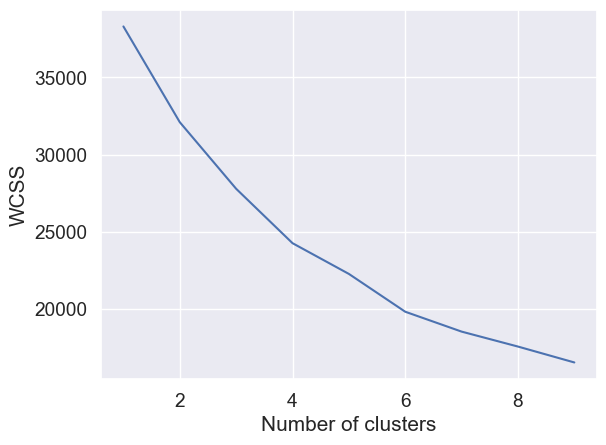

In [513]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [919]:
kmeans_new = KMeans(8)
kmeans_new.fit(x_scaled)
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [920]:
kmeans.labels_
kmeans.inertia_

16515.78319028388

In [921]:
clusters_new

,wordlwide,Action,Adventure,Animation,Romance,Horror,Crime,Sci-Fi,Mystery,Drama,Comedy,Fantasy,Thriller,Family,cluster_pred
0,2923706026,1,1,0,0,0,0,1,0,0,0,1,0,0,6
1,2799439100,1,1,0,0,0,0,1,0,1,0,0,0,0,6
2,2320250281,1,1,0,0,0,0,1,0,0,0,1,0,0,6
3,2264743305,0,0,0,1,0,0,0,0,1,0,0,0,0,7
4,2071310218,1,1,0,0,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,12544254,0,0,0,1,0,0,0,0,0,1,0,0,0,7
1759,12313323,0,0,0,1,0,0,0,0,0,1,0,0,0,7
1760,11416075,0,0,0,0,1,1,0,1,0,0,0,1,0,0
1761,11341016,0,0,0,0,0,1,0,0,0,1,0,0,0,1


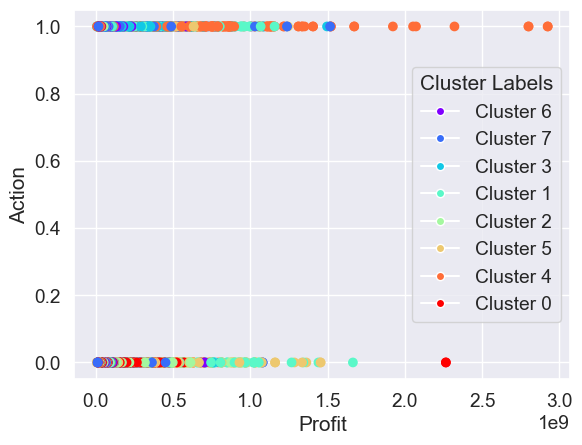

In [922]:
scatter = plt.scatter(clusters_new['wordlwide'],clusters_new['Action'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Profit')
plt.ylabel('Action')
cluster_labels = clusters_new['cluster_pred'].unique()
colors = [scatter.cmap(i / (len(cluster_labels) - 1)) for i in range(len(cluster_labels))]
legend_labels = [f'Cluster {label}' for label in cluster_labels]
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color) for label, color in zip(legend_labels, colors)], title='Cluster Labels')
plt.show()

/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_1052/2322825048.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusters_new[clusters_new["cluster_pred"] == cluster]["wordlwide"], ax=ax)
/var/folders/bv/bgrpp52x05nf96zx_01sm2_40000gn/T/ipykernel_1052/2322825048.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

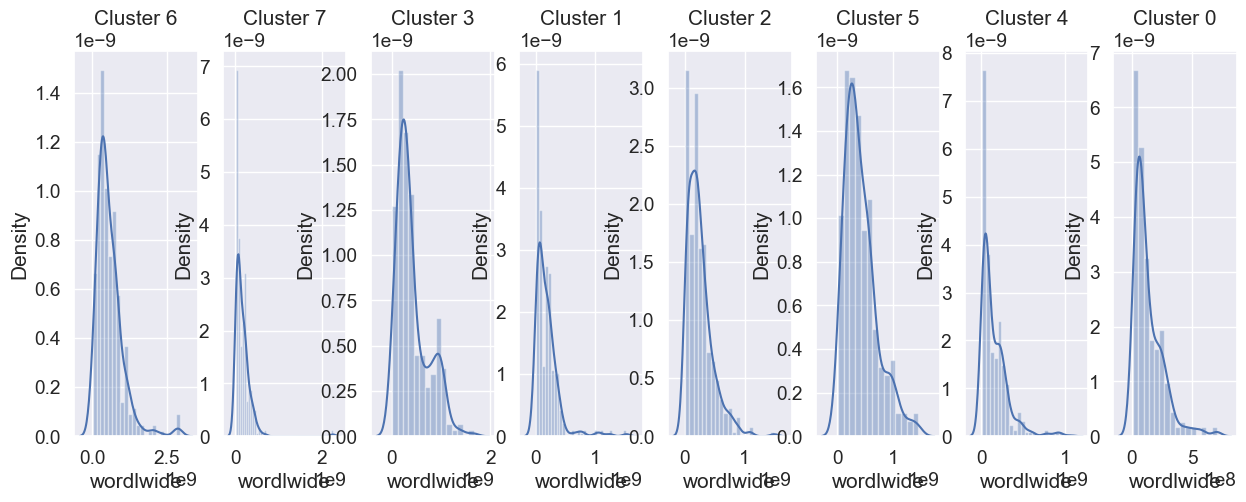

In [923]:
cluster_values = clusters_new["cluster_pred"].unique()

# Create subplots for each cluster
fig, axes = plt.subplots(1, len(cluster_values), figsize=(15, 5))

# Loop through the clusters and create distribution plots
for i, cluster in enumerate(cluster_values):
    ax = axes[i]
    sns.distplot(clusters_new[clusters_new["cluster_pred"] == cluster]["wordlwide"], ax=ax)
    ax.set_title(f'Cluster {cluster}')
    
plt.show()

In [67]:
flat_data=['Action', 'Adventure', 'Animation', 'Romance', 'Horror',
       'Crime', 'Sci-Fi', 'Mystery', 'Drama', 'Comedy', 'Fantasy', 'Thriller',
       'Family']

In [924]:
# Cluster & Genres breakdown 
for b in range(0,8):
    for a in flat_data: 
        try:
            if clusters_new[clusters_new["cluster_pred"]==b][a].value_counts()[1]>0.5* len(clusters_new[clusters_new["cluster_pred"]==b][a]):
                   print(f"{b}th Cluster's Genres \n" , clusters_new[clusters_new["cluster_pred"]==b][a].value_counts().name ) 
        except KeyError:
            pass

0th Cluster's Genres 
 Horror
0th Cluster's Genres 
 Mystery
0th Cluster's Genres 
 Thriller
1th Cluster's Genres 
 Action
1th Cluster's Genres 
 Crime
1th Cluster's Genres 
 Thriller
2th Cluster's Genres 
 Action
2th Cluster's Genres 
 Drama
2th Cluster's Genres 
 Thriller
3th Cluster's Genres 
 Adventure
3th Cluster's Genres 
 Fantasy
3th Cluster's Genres 
 Family
4th Cluster's Genres 
 Drama
4th Cluster's Genres 
 Comedy
5th Cluster's Genres 
 Adventure
5th Cluster's Genres 
 Animation
5th Cluster's Genres 
 Comedy
5th Cluster's Genres 
 Fantasy
5th Cluster's Genres 
 Family
6th Cluster's Genres 
 Action
6th Cluster's Genres 
 Adventure
6th Cluster's Genres 
 Sci-Fi
7th Cluster's Genres 
 Romance
7th Cluster's Genres 
 Drama
7th Cluster's Genres 
 Comedy


In [925]:
DFML.columns

Index(['Name', 'Director', 'distributor', 'Time', 'Year', 'TMDB', 'wordlwide',
       'DomesticOpening', 'Budget', 'Action', 'Adventure', 'Animation',
       'Romance', 'Horror', 'Crime', 'Sci-Fi', 'Mystery', 'Drama', 'Comedy',
       'Fantasy', 'Thriller', 'Family', 'Genre Cluster'],
      dtype='object')

In [926]:
DFML["Genre Cluster"]=clusters_new["cluster_pred"]
DFML

,Name,Director,distributor,Time,Year,TMDB,wordlwide,DomesticOpening,Budget,Action,...,Horror,Crime,Sci-Fi,Mystery,Drama,Comedy,Fantasy,Thriller,Family,Genre Cluster
0,Avatar,James Cameron,Twentieth Century Fox,162.00,2009,76.00,2923706026,77025481.00,237000000.00,1,...,0,0,1,0,0,0,1,0,0,6
1,Avengers: Endgame,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,83.00,2799439100,357115007.00,356000000.00,1,...,0,0,1,0,1,0,0,0,0,6
2,Avatar: The Way of Water,James Cameron,20th Century Studios,192.00,2022,77.00,2320250281,134100226.00,NaN,1,...,0,0,1,0,0,0,1,0,0,6
3,Titanic,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,62.00,2264743305,28638131.00,200000000.00,0,...,0,0,0,0,1,0,0,0,0,7
4,Star Wars: Episode VII - The Force Awakens,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,73.00,2071310218,247966675.00,245000000.00,1,...,0,0,1,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,Breakin' All the Rules,NaN,Screen GemsSee full company information,1 hr 25 min,2004,56.00,12544254,5088577.00,10000000.00,0,...,0,0,0,0,0,1,0,0,0,7
1759,Chasing Liberty,NaN,Warner Bros.See full company information,1 hr 41 min,2004,61.00,12313323,6081483.00,23000000.00,0,...,0,0,0,0,0,1,0,0,0,7
1760,Suspect Zero,NaN,Paramount PicturesSee full company information,1 hr 39 min,2004,58.00,11416075,3446375.00,27000000.00,0,...,1,1,0,1,0,0,0,1,0,0
1761,Connie and Carla,NaN,Universal PicturesSee full company information,1 hr 48 min,2004,62.00,11341016,3254940.00,27000000.00,0,...,0,1,0,0,0,1,0,0,0,1


In [927]:
DFml = DFML[['Director', 'distributor', 'Time', 'Year', 'TMDB', 'wordlwide', 'DomesticOpening', 'Budget', 'Genre Cluster']]
DFml

,Director,distributor,Time,Year,TMDB,wordlwide,DomesticOpening,Budget,Genre Cluster
0,James Cameron,Twentieth Century Fox,162.00,2009,76.00,2923706026,77025481.00,237000000.00,6
1,"Anthony Russo, Joe Russo",Walt Disney Studios Motion Pictures,181.00,2019,83.00,2799439100,357115007.00,356000000.00,6
2,James Cameron,20th Century Studios,192.00,2022,77.00,2320250281,134100226.00,NaN,6
3,"Werner Klingler, Herbert Selpin",Paramount Pictures,194.00,1997,62.00,2264743305,28638131.00,200000000.00,7
4,J.J. Abrams,Walt Disney Studios Motion Pictures,138.00,2015,73.00,2071310218,247966675.00,245000000.00,6
...,...,...,...,...,...,...,...,...,...
1758,NaN,Screen GemsSee full company information,1 hr 25 min,2004,56.00,12544254,5088577.00,10000000.00,7
1759,NaN,Warner Bros.See full company information,1 hr 41 min,2004,61.00,12313323,6081483.00,23000000.00,7
1760,NaN,Paramount PicturesSee full company information,1 hr 39 min,2004,58.00,11416075,3446375.00,27000000.00,0
1761,NaN,Universal PicturesSee full company information,1 hr 48 min,2004,62.00,11341016,3254940.00,27000000.00,1


# Linear Regression

In [11]:
DFml=DFml.drop(['Time','Director'],axis=1)

In [12]:
DFml['distributor']=DFml['distributor'].str.replace("See full company information","")

In [13]:
DFml['Year'] = pd.to_numeric(DFml['Year'], errors='coerce')
DFml['DomesticOpening'] = pd.to_numeric(DFml['DomesticOpening'], errors='coerce')

In [14]:
DFml['distributor'].fillna('Paramount Pictures', inplace=True)
DFml['TMDB'].fillna(DFml['TMDB'].median(), inplace=True)
DFml['DomesticOpening'].fillna(DFml['DomesticOpening'].median(), inplace=True)
DFml['Budget'].fillna(DFml['Budget'].median(), inplace=True)
DFml['Year'].fillna(DFml['Year'].median(), inplace=True)

In [15]:
label_encoder = LabelEncoder()

DFml['distributor_encoded'] = label_encoder.fit_transform(DFml['distributor'])

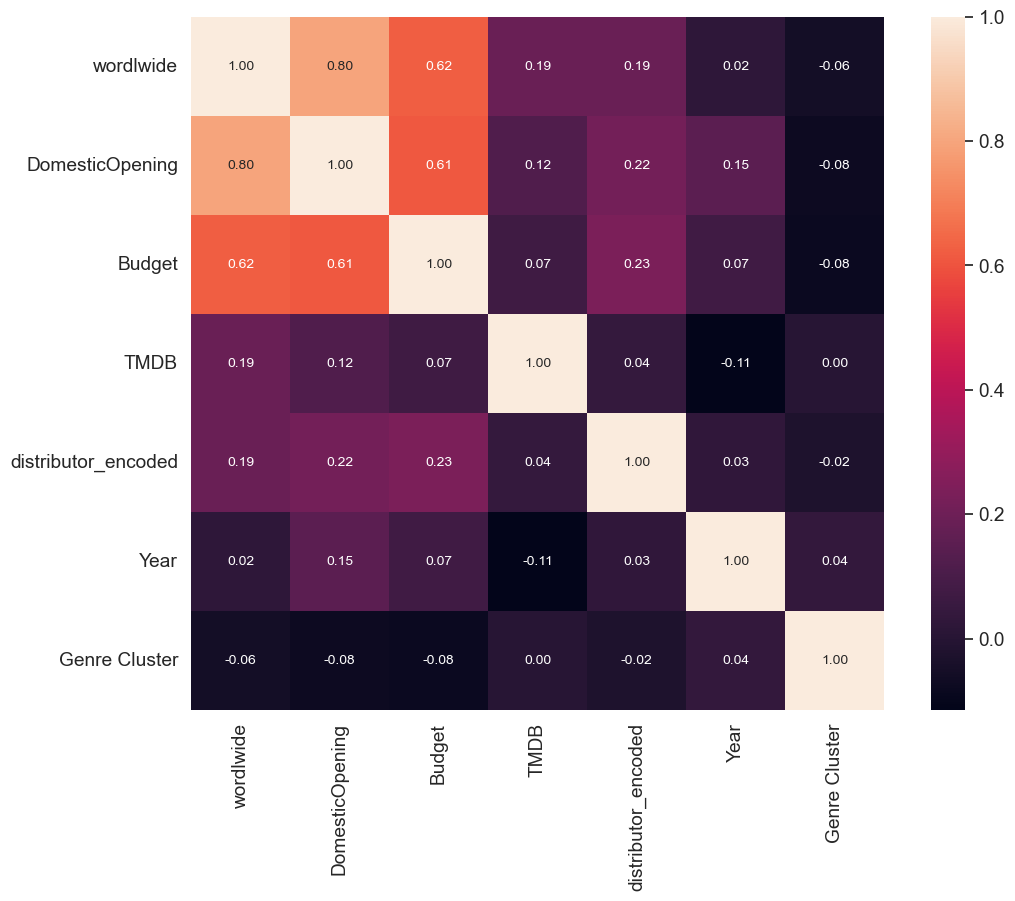

In [556]:
corrmat = data_encoded.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(12, 9)) 
k = 19 
cols = corrmat.nlargest(k, 'wordlwide')['wordlwide'].index
cm = np.corrcoef(data_encoded[cols].values.T) 
sns.set(font_scale=1.25) 
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show() 

In [17]:
data_encoded = DFml.drop(['distributor'], axis=1)

In [857]:
data_encoded.columns 

Index(['Year', 'TMDB', 'wordlwide', 'DomesticOpening', 'Budget',
       'Genre Cluster', 'distributor_encoded'],
      dtype='object')

In [937]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_encoded[[ 'Year', 'DomesticOpening', 'Budget','TMDB']]
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"]=variables.columns

In [938]:
vif

,vif,Features
0,49.45,Year
1,2.92,DomesticOpening
2,3.85,Budget
3,50.52,TMDB


In [562]:
data_encoded.to_csv("DFml.csv")
data_encoded

,Year,TMDB,wordlwide,DomesticOpening,Budget,Genre Cluster,distributor_encoded
0,2009.00,76.00,2923706026,77025481.00,237000000.00,4,71
1,2019.00,83.00,2799439100,357115007.00,356000000.00,4,78
2,2022.00,77.00,2320250281,134100226.00,50000000.00,4,2
3,1997.00,62.00,2264743305,28638131.00,200000000.00,3,52
4,2015.00,73.00,2071310218,247966675.00,245000000.00,4,78
...,...,...,...,...,...,...,...
1758,2004.00,56.00,12544254,5088577.00,10000000.00,3,62
1759,2004.00,61.00,12313323,6081483.00,23000000.00,3,79
1760,2004.00,58.00,11416075,3446375.00,27000000.00,0,52
1761,2004.00,62.00,11341016,3254940.00,27000000.00,6,76


In [18]:
data_encoded2 = data_encoded.copy()

In [1008]:
log_profit=np.log(data_encoded2["wordlwide"])
data_encoded2["Profit Log"]=log_profit
data_encoded2

,Year,TMDB,wordlwide,DomesticOpening,Budget,Genre Cluster,distributor_encoded,Profit Log
0,2009.00,76.00,2923706026,77025481.00,237000000.00,6,71,21.80
1,2019.00,83.00,2799439100,357115007.00,356000000.00,6,78,21.75
2,2022.00,77.00,2320250281,134100226.00,50000000.00,6,2,21.56
3,1997.00,62.00,2264743305,28638131.00,200000000.00,7,52,21.54
4,2015.00,73.00,2071310218,247966675.00,245000000.00,6,78,21.45
...,...,...,...,...,...,...,...,...
1758,2004.00,56.00,12544254,5088577.00,10000000.00,7,62,16.34
1759,2004.00,61.00,12313323,6081483.00,23000000.00,7,79,16.33
1760,2004.00,58.00,11416075,3446375.00,27000000.00,0,52,16.25
1761,2004.00,62.00,11341016,3254940.00,27000000.00,1,76,16.24


In [565]:
data_encoded=data_encoded.reset_index()
data_encoded=data_encoded.drop(['index'],axis=1)
data_encoded

,Year,TMDB,wordlwide,DomesticOpening,Budget,Genre Cluster,distributor_encoded
0,2009.00,76.00,2923706026,77025481.00,237000000.00,4,71
1,2019.00,83.00,2799439100,357115007.00,356000000.00,4,78
2,2022.00,77.00,2320250281,134100226.00,50000000.00,4,2
3,1997.00,62.00,2264743305,28638131.00,200000000.00,3,52
4,2015.00,73.00,2071310218,247966675.00,245000000.00,4,78
...,...,...,...,...,...,...,...
2731,2004.00,56.00,12544254,5088577.00,10000000.00,3,62
2732,2004.00,61.00,12313323,6081483.00,23000000.00,3,79
2733,2004.00,58.00,11416075,3446375.00,27000000.00,0,52
2734,2004.00,62.00,11341016,3254940.00,27000000.00,6,76


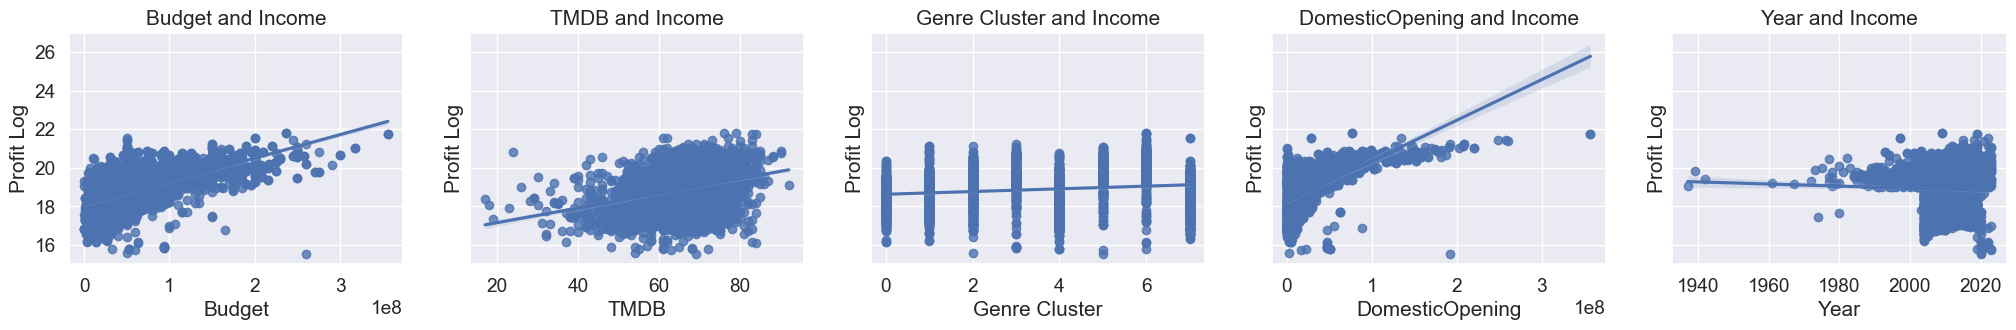

In [943]:
#Checking Linearity
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize=(25, 3))

sns.regplot(x="Budget", y="Profit Log", data=data_encoded2, ax=ax1)
ax1.set_title("Budget and Income")
ax1.set_xlabel("Budget")

sns.regplot(x="TMDB", y="Profit Log", data=data_encoded2, ax=ax2)
ax2.set_title("TMDB and Income")
ax2.set_xlabel("TMDB")

sns.regplot(x="Genre Cluster", y="Profit Log", data=data_encoded2, ax=ax3)
ax3.set_title("Genre Cluster and Income")
ax3.set_xlabel("Genre Cluster")

sns.regplot(x="DomesticOpening", y="Profit Log", data=data_encoded2, ax=ax4)
ax4.set_title("DomesticOpening and Income")
ax4.set_xlabel("DomesticOpening")

sns.regplot(x="Year", y="Profit Log", data=data_encoded2, ax=ax5)
ax5.set_title("Year and Income")
ax5.set_xlabel("Year")

plt.show()

In [1219]:
targets=data_encoded2["Profit Log"]
inputs=data_encoded2.drop(["Profit Log"],axis=1)
scaler=StandardScaler()
scaler.fit(inputs)
inputsscaled=scaler.transform(inputs)

In [1220]:
x_train,x_test,y_train,y_test=train_test_split(inputsscaled,targets,test_size=0.2,random_state=365)

LinearRegression()

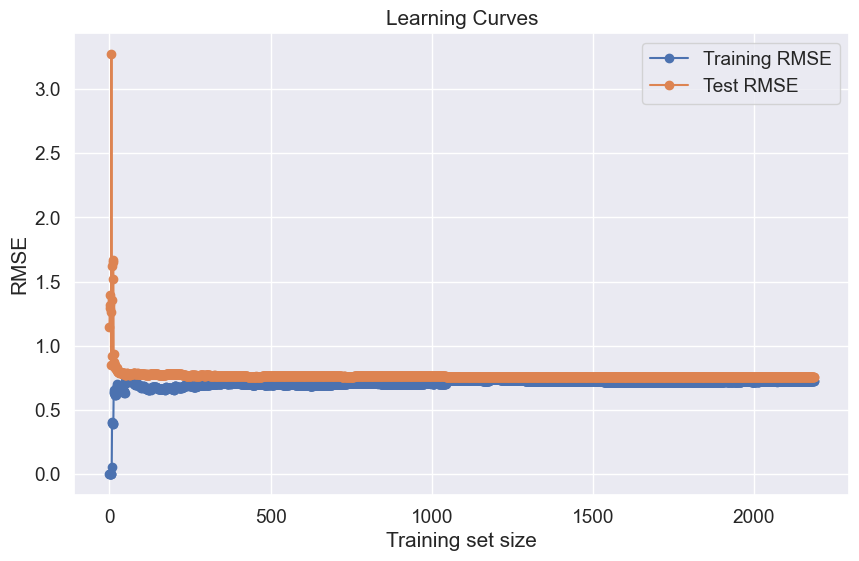

In [1207]:
train_errors = []
test_errors = []

for m in range(1, len(x_train)):
    reg = LinearRegression()
    reg.fit(x_train[:m], y_train[:m])

    y_hat_lc = reg.predict(x_train[:m])
    y_hat_test_lc = reg.predict(x_test)

    train_errors.append(mean_squared_error(y_train[:m], y_hat_lc))
    test_errors.append(mean_squared_error(y_test, y_hat_test_lc))

train_rmse = np.sqrt(train_errors)
test_rmse = np.sqrt(test_errors)

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE', marker='o')
plt.plot(test_rmse, label='Test RMSE', marker='o')
plt.title('Learning Curves')
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Learning curves show positive insights 

In [1221]:
y_hat=reg.predict(x_train)

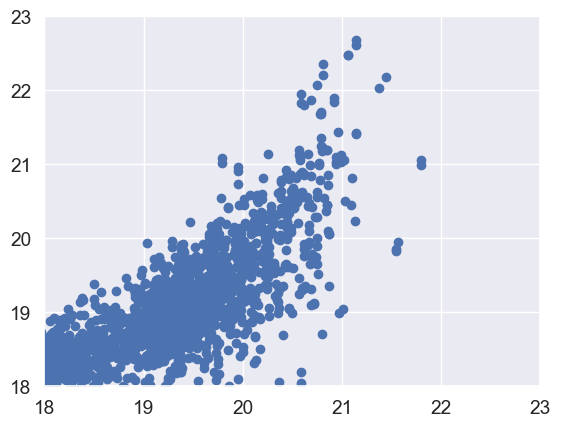

In [1222]:
plt.scatter(y_train,y_hat)
plt.xlim(18,23)
plt.ylim(18,23)
plt.show()

Text(0.5, 16.944444444444436, 'Residuals')

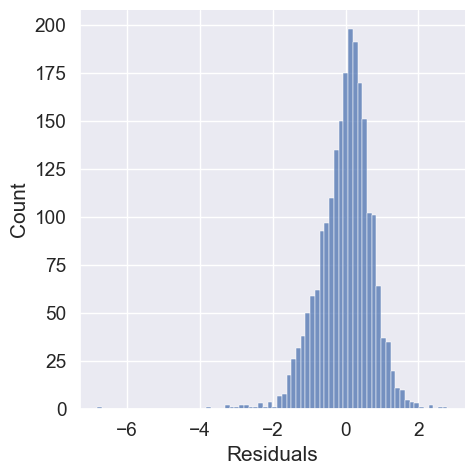

In [1223]:
sns.displot(y_train-y_hat) 
plt.xlabel("Residuals")

In [1227]:
mean_absolute_percentage_error(np.exp(y_train),np.exp(y_hat))  

1.1612442766921418

In [1226]:
mean_squared_error(y_train,y_hat,squared=False)

0.7245886311865122

In [1216]:
reg.score(x_train,y_train)

0.56083692459274

In [1217]:
regsum=pd.DataFrame(inputs.columns.values,columns=["Features"])
regsum["weights"]=reg.coef_
regsum

,Features,weights
0,Year,-0.11
1,TMDB,0.22
2,DomesticOpening,0.45
3,Budget,0.38
4,Genre Cluster,0.01
5,distributor_encoded,0.10


In [1183]:
y_hat_test=reg.predict(x_test)

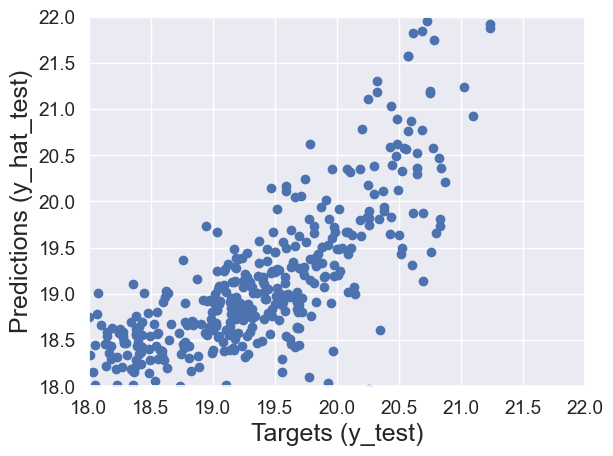

In [1184]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(18,22)
plt.ylim(18,22)
plt.show()

In [1185]:
df_pf=pd.DataFrame(y_hat_test,columns=["Prediction"])
df_pf.head()

,Prediction
0,20.76
1,20.77
2,18.46
3,18.17
4,18.56


In [1186]:
df_pf=pd.DataFrame(np.exp(y_hat_test),columns=["Prediction"])
df_pf.head()

,Prediction
0,1036346598.78
1,1046222550.22
2,103973934.36
3,78057716.63
4,115170985.69


In [1187]:
y_test=y_test.reset_index(drop=True)
y_test.head()

0   20.57
1   20.69
2   18.76
3   17.16
4   18.55
Name: Profit Log, dtype: float64

In [1188]:
df_pf["Target"]=np.exp(y_test)
df_pf

,Prediction,Target
0,1036346598.78,858848019.00
1,1046222550.22,967724775.00
2,103973934.36,140705322.00
3,78057716.63,28237488.00
4,115170985.69,114178613.00
...,...,...
543,720606431.66,755356711.00
544,115721376.20,48190704.00
545,59762460.98,64626786.00
546,88603454.53,78418811.00


In [1189]:
mean_squared_error(df_pf["Prediction"],df_pf["Target"],squared=False)

5245249175.510761

In [1190]:
mean_absolute_percentage_error(df_pf["Prediction"],df_pf["Target"])

0.6056050797368855

### The model is presenting challenges in producing accurate predictions, indicating a need for more complex models. Consequently, the outcome observed is indicative of underfitting.

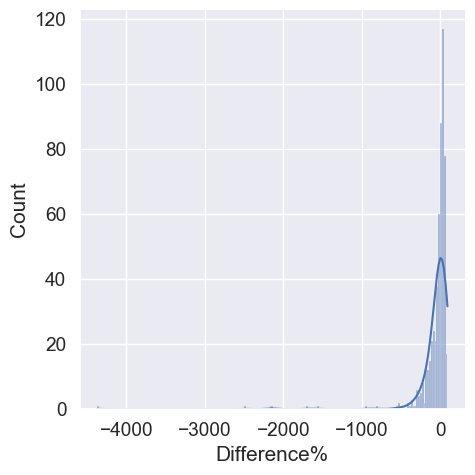

In [1195]:
sns.displot(df_pf["Difference%"],kde=True)

In [1192]:
df_pf["Residuals"]=df_pf["Target"]-df_pf["Prediction"]

In [1193]:
df_pf["Difference%"]=df_pf["Residuals"]/df_pf["Target"]*100

In [1194]:
df_pf

,Prediction,Target,Residuals,Difference%
0,1036346598.78,858848019.00,-177498579.78,-20.67
1,1046222550.22,967724775.00,-78497775.22,-8.11
2,103973934.36,140705322.00,36731387.64,26.11
3,78057716.63,28237488.00,-49820228.63,-176.43
4,115170985.69,114178613.00,-992372.69,-0.87
...,...,...,...,...
543,720606431.66,755356711.00,34750279.34,4.60
544,115721376.20,48190704.00,-67530672.20,-140.13
545,59762460.98,64626786.00,4864325.02,7.53
546,88603454.53,78418811.00,-10184643.53,-12.99


In [1196]:
df_pf.describe()

,Prediction,Target,Residuals,Difference%
count,548.00,548.00,548.00,548.00
mean,514461516.95,272426140.15,-242035376.80,-56.89
std,5366126091.92,305169798.38,5244449258.33,287.77
min,33117300.08,5989583.00,-122374309664.03,-4371.39
25%,92094782.66,60899319.50,-43189753.15,-60.92
50%,132062977.62,185632072.00,6933514.77,4.81
75%,233186138.34,351553046.75,95349932.46,34.90
max,125173748764.03,2799439100.00,762662513.78,89.86


In [1075]:
df_pf2 = df_pf.drop(322)

In [812]:
df_pf.sort_values(by="Difference%").iloc[0:40]

,Prediction,Target,Residuals,Difference%
322,124813949375.53,2799439100.00,-122014510275.53,-4358.53
235,199510514.86,7762797.00,-191747717.86,-2470.09
400,183574384.96,8204616.00,-175369768.96,-2137.45
118,155797679.71,7090000.00,-148707679.71,-2097.43
513,407409361.26,22044058.00,-385365303.26,-1748.16
129,118240208.77,7196843.00,-111043365.77,-1542.95
286,62279455.32,5989583.00,-56289872.32,-939.80
201,104418184.03,11141307.00,-93276877.03,-837.22
350,120709781.59,18612999.00,-102096782.59,-548.52
150,66579227.10,10597464.00,-55981763.10,-528.26


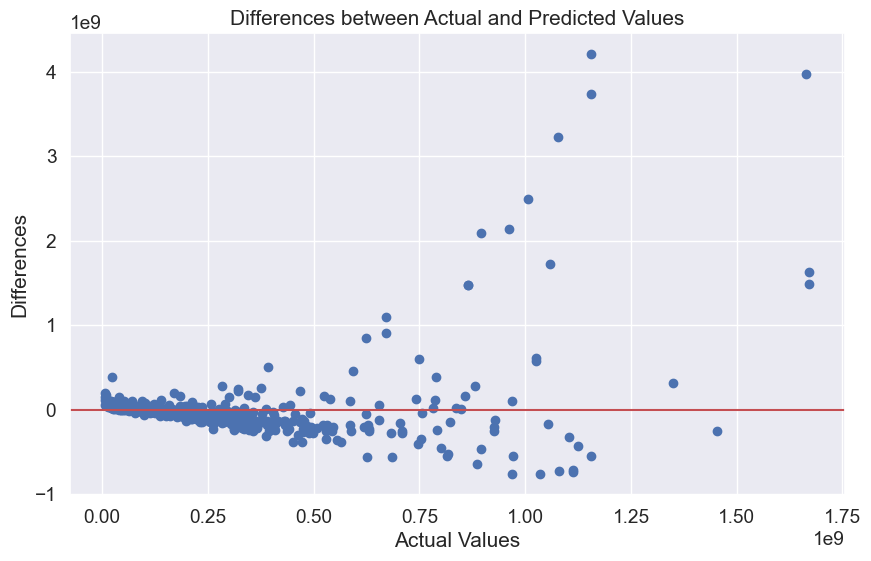

In [1077]:
differences2 = df_pf2['Prediction'] - df_pf2['Target']

plt.figure(figsize=(10, 6))
plt.scatter(df_pf2['Target'], differences2)
plt.title('Differences between Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Differences')
plt.axhline(y=0, color='r', linestyle='-')  
plt.show()

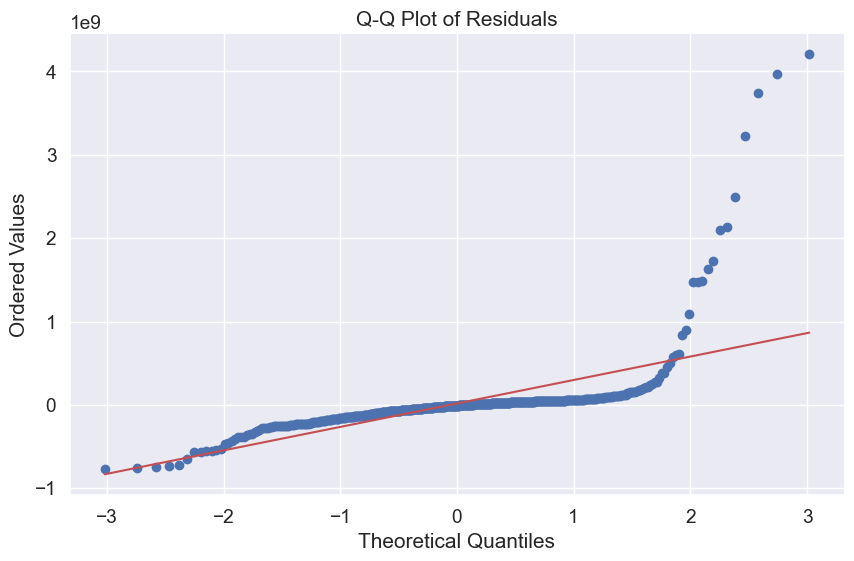

In [1088]:
differences2 = df_pf2['Prediction'] - df_pf2['Target']

plt.figure(figsize=(10, 6))
stats.probplot(differences2, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Ridge & Lasso Regression

Best alpha value: 35.0


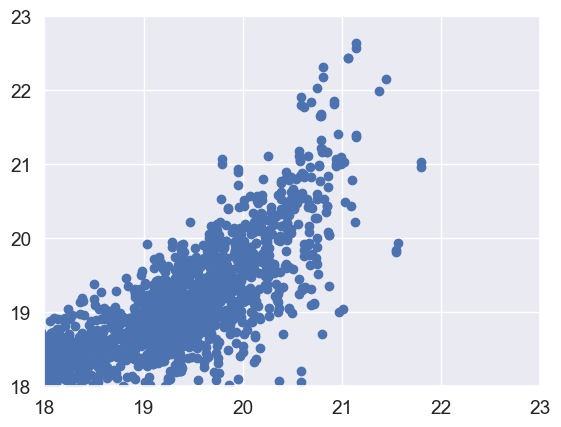

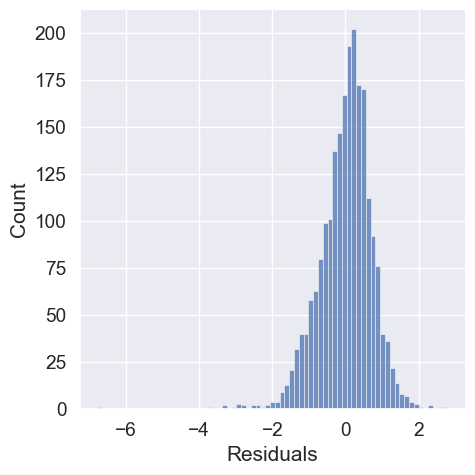

Root Mean Squared Error: 0.7246375212129058
R^2 Score: 0.5607776613138362


In [1230]:

targets = data_encoded2["Profit Log"]
inputs = data_encoded2.drop(["Profit Log"], axis=1)

scaler = StandardScaler()
scaler.fit(inputs)
inputsscaled = scaler.transform(inputs)

x_train, x_test, y_train, y_test = train_test_split(inputsscaled, targets, test_size=0.2, random_state=365)

alpha_values = {
    'alpha': np.concatenate([
        np.arange(0.05, 0.5, 0.01), 
        np.arange(0.05, 1, 0.5),    
        np.arange(0.5, 10, 1),        
        np.arange(5, 50, 10), 
        np.arange(5, 100, 50), 
        np.arange(25, 500, 100), 
        np.arange(50, 500, 1000),     
    ])
}

ridge = Ridge()


grid = GridSearchCV(ridge, alpha_values, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)


print("Best alpha value:", grid.best_params_['alpha'])


reg = Ridge(alpha=grid.best_params_['alpha'])
reg.fit(x_train, y_train)

y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlim(18, 23)
plt.ylim(18, 23)
plt.show()

sns.displot(y_train - y_hat) 
plt.xlabel("Residuals")
plt.show()

rmse = mean_squared_error(y_train, y_hat, squared=False)
score = reg.score(x_train, y_train)

print("Root Mean Squared Error:", rmse)
print("R^2 Score:", score)

Best alpha value: 0.001


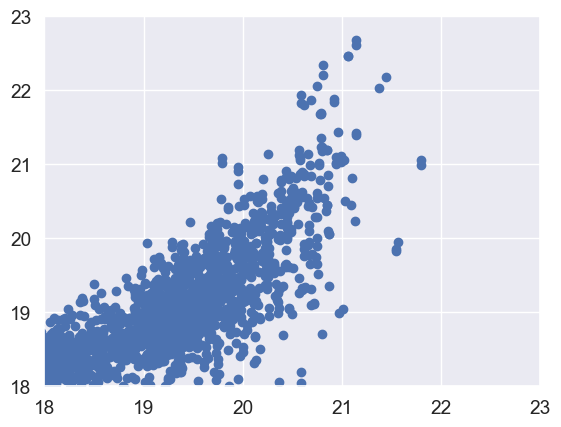

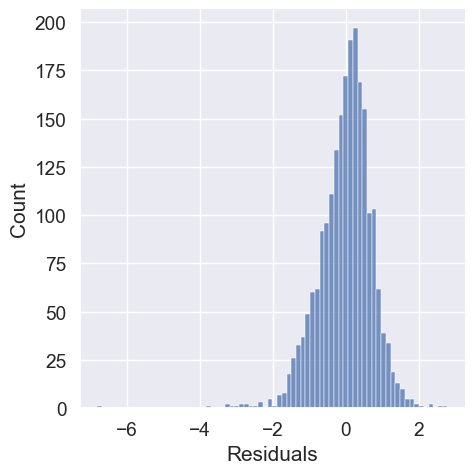

Root Mean Squared Error: 0.7245914804177231
R^2 Score: 0.5608334726753044


In [1236]:
targets = data_encoded2["Profit Log"]
inputs = data_encoded2.drop(["Profit Log"], axis=1)

scaler = StandardScaler()
scaler.fit(inputs)
inputsscaled = scaler.transform(inputs)

x_train, x_test, y_train, y_test = train_test_split(inputsscaled, targets, test_size=0.2, random_state=365)

alpha_values = {
    'alpha': np.concatenate([
        np.arange(0.001, 0.01, 0.001), 
        np.arange(0.01, 0.1, 0.01),   
        np.arange(0.1, 1.0, 0.1),       
        np.arange(5, 50, 10), 
        np.arange(5, 100, 50), 
        np.arange(25, 500, 100), 
        np.arange(50, 500, 1000),     
    ]) }



grid = GridSearchCV(Lasso(), alpha_values, scoring='neg_mean_squared_error', cv=5)
grid.fit(x_train, y_train)


print("Best alpha value:", grid.best_params_['alpha'])


reg = Lasso(alpha=grid.best_params_['alpha'])
reg.fit(x_train, y_train)

y_hat = reg.predict(x_train)

plt.scatter(y_train, y_hat)
plt.xlim(18, 23)
plt.ylim(18, 23)
plt.show()

sns.displot(y_train - y_hat) 
plt.xlabel("Residuals")
plt.show()

rmse = mean_squared_error(y_train, y_hat, squared=False)
score = reg.score(x_train, y_train)

# Print RMSE and R^2 score
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", score)

### No improvement at all by new models , same measures as it was in Linear Regression. Result , the initial model has not overfitting and multicollieanirt problem , our all models have underfitting problem by far

# Random Forest

In [1239]:
X = data_encoded.drop(columns=['wordlwide'])
y = data_encoded['wordlwide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': range(100, 2000 , 20),  
    'max_depth': range(10, 110, 11),      
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt']
}

random_forest = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(random_forest, param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute percentage error: {mape}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/aa085/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the defa

Best Parameters: {'n_estimators': 1620, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 87, 'bootstrap': False}
Mean absolute percentage error: 0.44645853442235467
Mean Squared Error: 8441336479753352.0
R-squared: 0.8712362381408569


In [1242]:
y_train_pred = best_rf.predict(X_train)

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Absolute Percentage Error: {mape_train}")
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training Mean Absolute Percentage Error: 0.00016389191744593703
Training Mean Squared Error: 44656414202.35995
Training R-squared: 0.9999995202185722


### On the contrary, the Random Forest model appears to be encountering overfitting issues. Our parameter tuning process has identified parameters that yield the highest R-Square value, which could potentially contribute to the overfitting problem

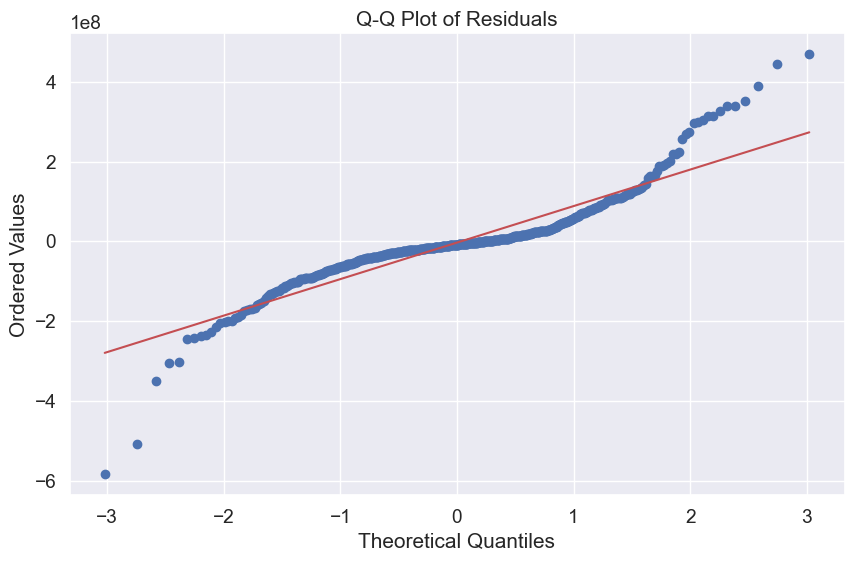

In [1094]:
plt.figure(figsize=(10, 6))
stats.probplot(results_df['Differences'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [1041]:
features = ["Year","TMDB","DomesticOpening","Budget","Genre Cluster","distributor_encoded"]
target = 'wordlwide'

X2 = data_encoded[features]
y2 = data_encoded[target]

kf = KFold(n_splits=7, shuffle=True, random_state=42)

rf = RandomForestRegressor(n_estimators=220, max_depth=5, random_state=42)

fold_performance = []
problematic_rows = []

for train_index, test_index in kf.split(X):
    
    X_train2, X_test2 = X2.iloc[train_index], X2.iloc[test_index]
    y_train2, y_test2 = y2.iloc[train_index], y2.iloc[test_index]
    rf.fit(X_train2, y_train2)
    y_pred2 = rf.predict(X_test2)
    mse = mean_squared_error(y_test2, y_pred2)
    r2 = r2_score(y_test2, y_pred2)

    fold_performance.append((mse, r2))
    if r2 < 0.3:
        problematic_rows.extend(list(zip(test_index, y_test2, y_pred2)))
fold_performance, problematic_rows[:5]  

([(1.4124204917967206e+16, 0.7596794278797804),
  (1.5081526102166158e+16, 0.7810572282986917),
  (1.859064685066471e+16, 0.6841390607552332),
  (2.947127603108522e+16, 0.7620150315604697),
  (2.4747226214448972e+16, 0.8058383542209657),
  (2.0799262330657576e+16, 0.7461014374852913),
  (1.604205752463947e+16, 0.8244342808849743)],
 [])

### Though, model did well on parts of training dataset it struggled with unseen data. It is big concern about over-fitting

In [1042]:
r2_scores = [performance[1] for performance in fold_performance]
std_dev_r2 = np.std(r2_scores)
std_dev_r2

0.04205633467536658

# xgboost

In [373]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1243]:
X = data_encoded.drop(columns=['wordlwide'])
y = data_encoded['wordlwide']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': range(100, 2000, 100),
    'max_depth': range(3, 10),  
    'learning_rate': [0.01, 0.75, 0.05],  
    'alpha': [0.25, 0.5, 0.75],
    'lambda': [1e-5, 1e-2, 0.1], 
}

xgb_model = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean absolute percentage error: {mape}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 1700, 'max_depth': 5, 'learning_rate': 0.05, 'lambda': 0.1, 'alpha': 0.5}
Mean absolute percentage error: 0.40912448180556094
Mean Squared Error: 1.4216622931742292e+16
R-squared: 0.7831402818718602


In [1245]:
y_train_pred = best_xgb.predict(X_train)

mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Absolute Percentage Error: {mape_train}")
print(f"Training Mean Squared Error: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training Mean Absolute Percentage Error: 0.07678285547538172
Training Mean Squared Error: 130125529201740.44
Training R-squared: 0.998601951963575


### Same problem as in Random Forest . Model over-fitted training data

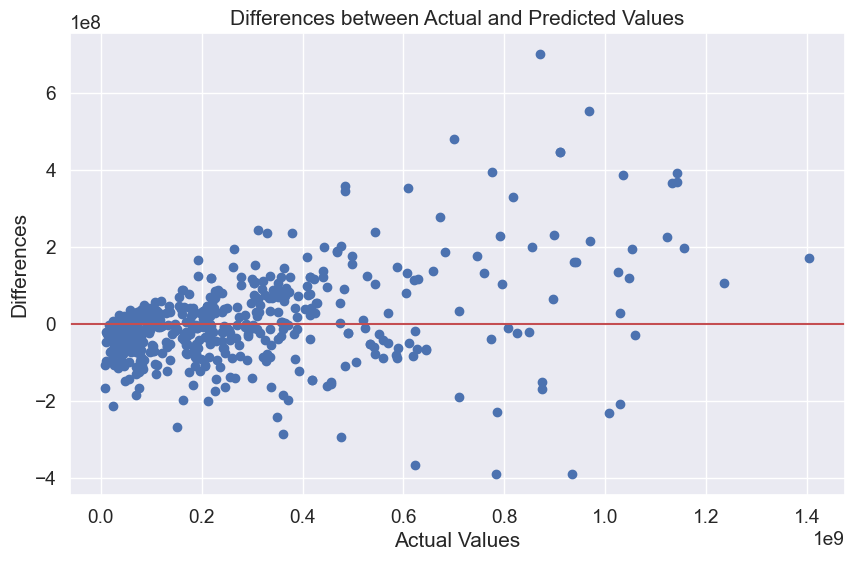

Mean Squared Error: 1.2787207895573832e+16
R-squared: 0.804944513672895


In [1096]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

results_df['Differences'] = results_df['Actual'] - results_df['Predicted']

plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Differences'])
plt.title('Differences between Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Differences')
plt.axhline(y=0, color='r', linestyle='-') 
plt.show()

mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
r2 = r2_score(results_df['Actual'], results_df['Predicted'])

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

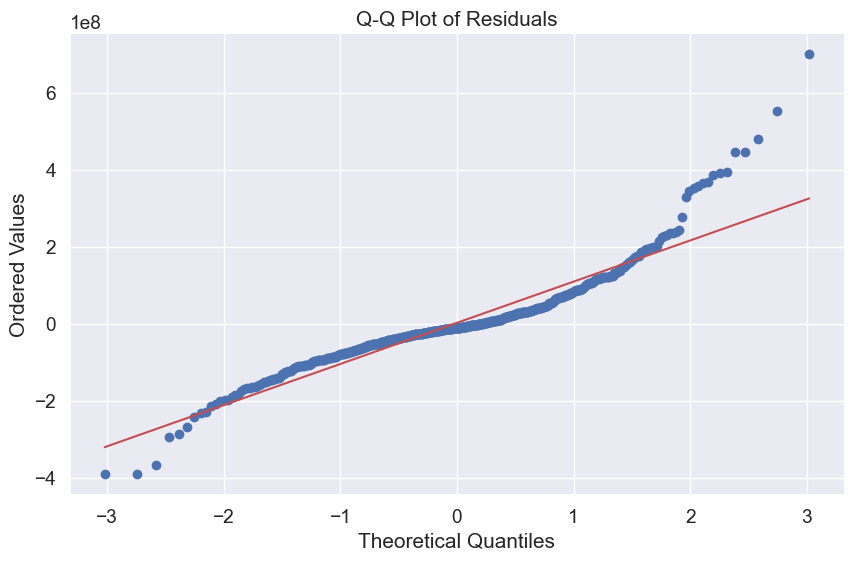

In [1097]:
plt.figure(figsize=(10, 6))
stats.probplot(results_df['Differences'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [1044]:
kf = KFold(n_splits=7, shuffle=True, random_state=42)

fold_performance = []

for train_index, test_index in kf.split(X):
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]

    y_pred = xgb_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    fold_performance.append((mse, r2))

for i, (mse, r2) in enumerate(fold_performance, start=1):
    print(f"Fold {i}: MSE = {mse}, R² = {r2}")

average_mse = np.mean([mse for mse, _ in fold_performance])
average_r2 = np.mean([r2 for _, r2 in fold_performance])
print(f"\nAverage MSE: {average_mse}, Average R²: {average_r2}")

Fold 1: MSE = 1.2931533159275924e+16, R² = 0.7799725035654572
Fold 2: MSE = 1.0481809743797654e+16, R² = 0.8478326091002674
Fold 3: MSE = 9417944049864274.0, R² = 0.8399861673861859
Fold 4: MSE = 1.3117284419815976e+16, R² = 0.8940759634781481
Fold 5: MSE = 1.2165221882087164e+16, R² = 0.9045541717918241
Fold 6: MSE = 1.1908330823657864e+16, R² = 0.8546338793169719
Fold 7: MSE = 1.0901736364935982e+16, R² = 0.8806904175743862

Average MSE: 1.1560551491919262e+16, Average R²: 0.8573922446018916


# TensorFlow , Neural Network

Epoch 1/20
55/55 [==============================] - 0s 2ms/step - loss: 0.0137 - mean_absolute_error: 0.0758 - val_loss: 0.0033 - val_mean_absolute_error: 0.0417
Epoch 2/20
55/55 [==============================] - 0s 739us/step - loss: 0.0041 - mean_absolute_error: 0.0411 - val_loss: 0.0030 - val_mean_absolute_error: 0.0365
Epoch 3/20
55/55 [==============================] - 0s 688us/step - loss: 0.0034 - mean_absolute_error: 0.0368 - val_loss: 0.0028 - val_mean_absolute_error: 0.0372
Epoch 4/20
55/55 [==============================] - 0s 697us/step - loss: 0.0032 - mean_absolute_error: 0.0362 - val_loss: 0.0024 - val_mean_absolute_error: 0.0348
Epoch 5/20
55/55 [==============================] - 0s 721us/step - loss: 0.0030 - mean_absolute_error: 0.0350 - val_loss: 0.0024 - val_mean_absolute_error: 0.0344
Epoch 6/20
55/55 [==============================] - 0s 719us/step - loss: 0.0028 - mean_absolute_error: 0.0326 - val_loss: 0.0024 - val_mean_absolute_error: 0.0342
Epoch 7/20
55/55 [

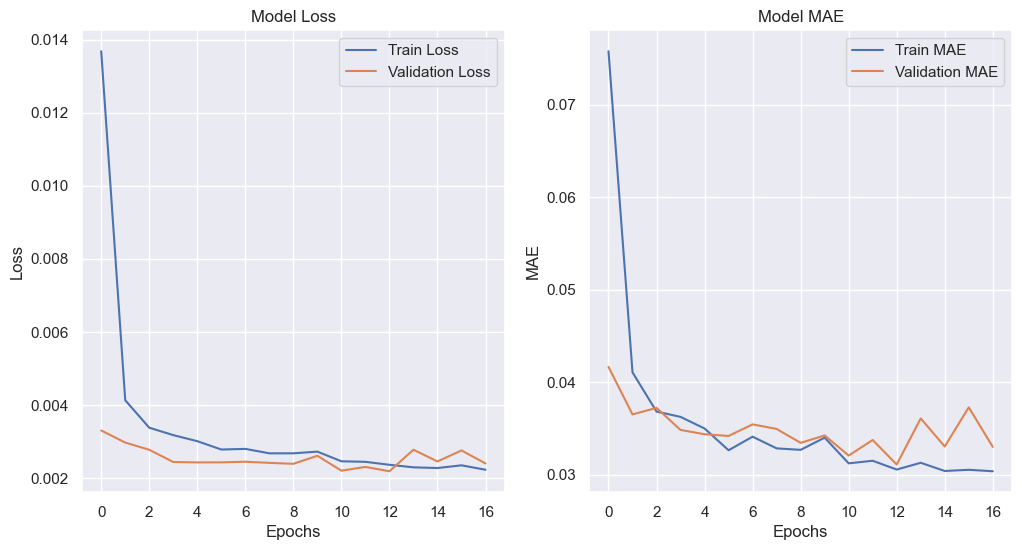

In [30]:
X = data_encoded.drop('wordlwide', axis=1)
y = data_encoded['wordlwide']

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_normalized, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=4, 
    restore_best_weights=True
)


history = model.fit(
    X_train, y_train,
    epochs=20,  
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss}")
print(f"Test MAE: {test_mae}")


predictions = model.predict(X_test)
r_squared = r2_score(y_test, predictions)
print(f"R-squared: {r_squared}")

y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
mape = np.mean(np.abs((y_test_original - predictions_original) / y_test_original)) * 100
print(f"MAPE: {mape}%")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'], label='Train MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()

          Actual    Predicted  Absolute Difference  Percentage Difference
137  255745157.0  255027424.0             717733.0               0.280644
319  363204635.0  361702880.0            1501755.0               0.413474
215  621537519.0  624884864.0            3347345.0               0.538559
34   222724172.0  223994224.0            1270052.0               0.570235
406   96593018.0   95996480.0             596538.0               0.617579
386  146965787.0  145787616.0            1178171.0               0.801663
159  146428180.0  145011776.0            1416404.0               0.967303
363  773350147.0  762637376.0           10712771.0               1.385242
355  359200044.0  354141888.0            5058156.0               1.408172
295  117094902.0  118767064.0            1672162.0               1.428040
         Actual    Predicted  Absolute Difference  Percentage Difference
19   22757764.0  117568792.0           94811028.0             416.609593
537  27506452.0  145268880.0          11

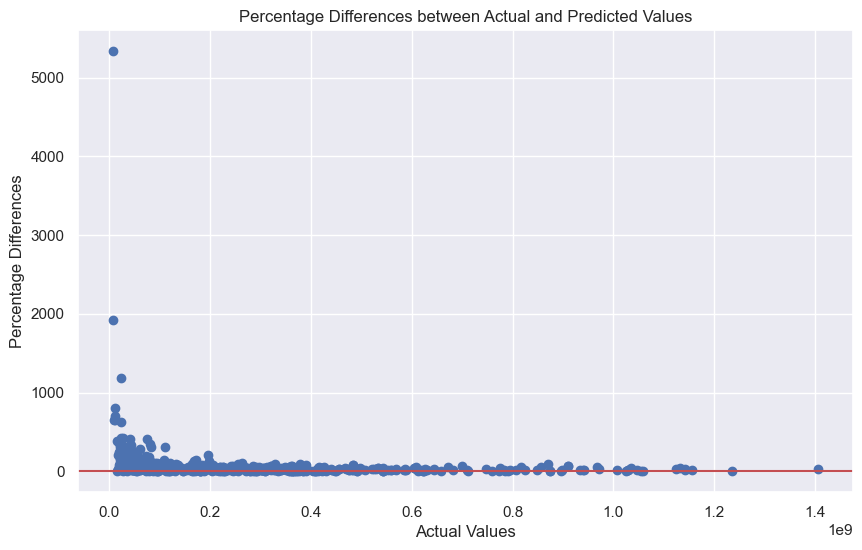

In [36]:
actual_values_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
predicted_values_original_scale = scaler_y.inverse_transform(predictions).flatten()

comparison_df = pd.DataFrame({
    'Actual': actual_values_original_scale,
    'Predicted': predicted_values_original_scale
})

comparison_df['Absolute Difference'] = abs(comparison_df['Predicted'] - comparison_df['Actual'])
comparison_df['Percentage Difference'] = (comparison_df['Absolute Difference'] / comparison_df['Actual'])*100

print(comparison_df.sort_values(by="Percentage Difference").head(10))
print(comparison_df.sort_values(by="Percentage Difference").tail(10))
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Percentage Difference'])
plt.title('Percentage Differences between Actual and Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Percentage Differences')
plt.axhline(y=0, color='r', linestyle='-')  
plt.show()

In [34]:
comparison_df.head() 

,Actual,Predicted,Absolute Difference,Percentage Difference
0,236350661.0,328641568.0,92290907.0,39.048297
1,212902372.0,271553472.0,58651100.0,27.548354
2,362211740.0,617283456.0,255071716.0,70.420610
3,180563636.0,167852944.0,12710692.0,7.039453
4,314975955.0,213368144.0,101607811.0,32.258910


18/18 [==============================] - 0s 527us/step


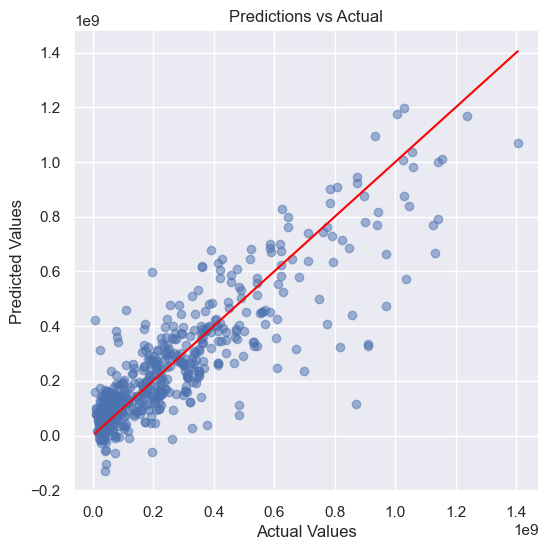

In [32]:
predictions = model.predict(X_test)
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()

plt.figure(figsize=(6, 6))
plt.scatter(y_test_original, predictions_original, alpha=0.5)
plt.plot([min(y_test_original), max(y_test_original)], [min(y_test_original), max(y_test_original)], color='red') # y=x line
plt.title('Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Model is demonstrating strong performance, comfortably avoiding both underfitting and overfitting. Given its superior metrics and conditions, I will proceed with this model as the one that stands out as the best choice.

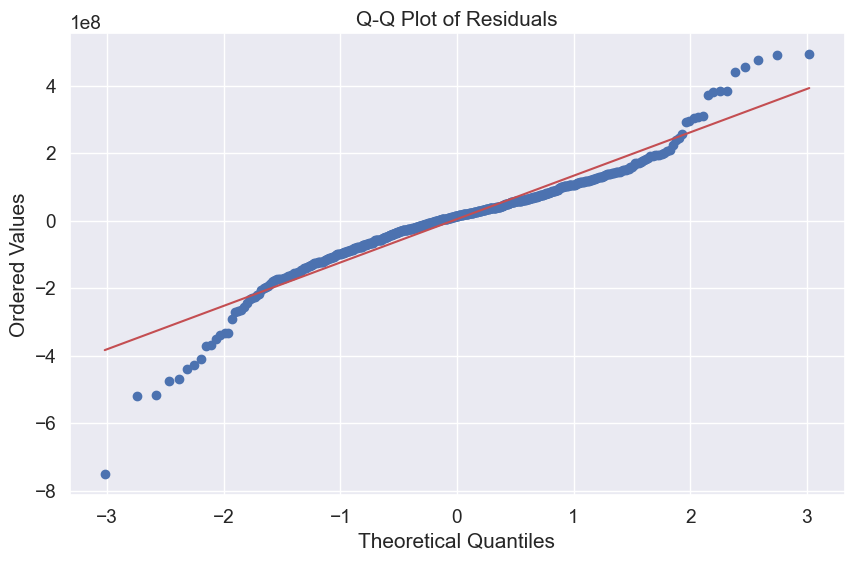

In [1252]:
differences = comparison_df['Predicted'] - comparison_df['Actual']
plt.figure(figsize=(10, 6))
stats.probplot(differences, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

### The presence of some outliers in our data is a natural characteristic. Removing them would lead to a loss of valuable insights and potentially result in overfitting

In [442]:
pd.set_option('display.float_format', '{:.2f}'.format)